In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm, skew


In [2]:
train = pd.read_csv('C:/Users/wuhao/Desktop/springboard/capstone two/lecture02/house price/input/train.csv', index_col = 0)
test = pd.read_csv('C:/Users/wuhao/Desktop/springboard/capstone two/lecture02/house price/input/test.csv', index_col = 0)

In [3]:
train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [4]:
print('train : ' + str(train.shape))
print('test : ' +str(test.shape))

train : (1460, 80)
test : (1459, 79)


# step 2: explore data set(EDA part)

In [5]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = np.log1p(train.SalePrice.values)
y_train_original = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop = True)
all_data.drop(['SalePrice'], axis = 1, inplace = True)
print('all_data size is :{}'.format(all_data.shape))

all_data size is :(2919, 79)


## we want to explore the distribution of the missing values

In [6]:
all_data_na = (all_data.isnull().sum()/len(all_data))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)[:30]
missing_data = pd.DataFrame({'Missing_data_Ratio': all_data_na})
missing_data.head(17)

,Missing_data_Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071
GarageYrBlt,5.447071


### the distrbution of missing data 

Text(0.5, 1.0, 'Percentages missing data by Variables')

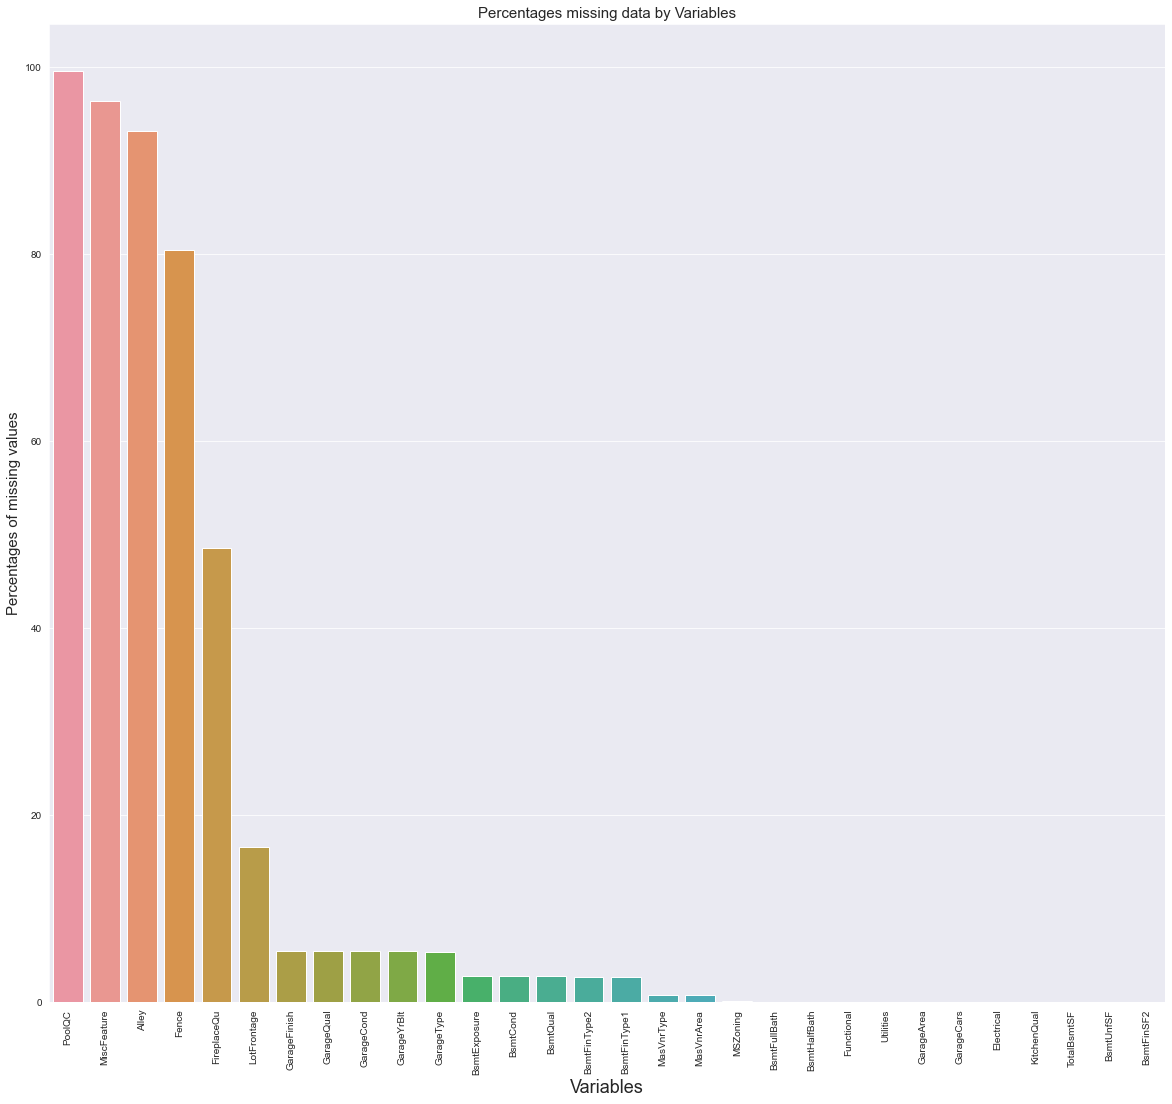

In [7]:
f, ax = plt.subplots(figsize = (20,18))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Variables', fontsize=18)
plt.ylabel('Percentages of missing values', fontsize=15)
plt.title('Percentages missing data by Variables', fontsize=15)


### the correlations of variables

<AxesSubplot:>

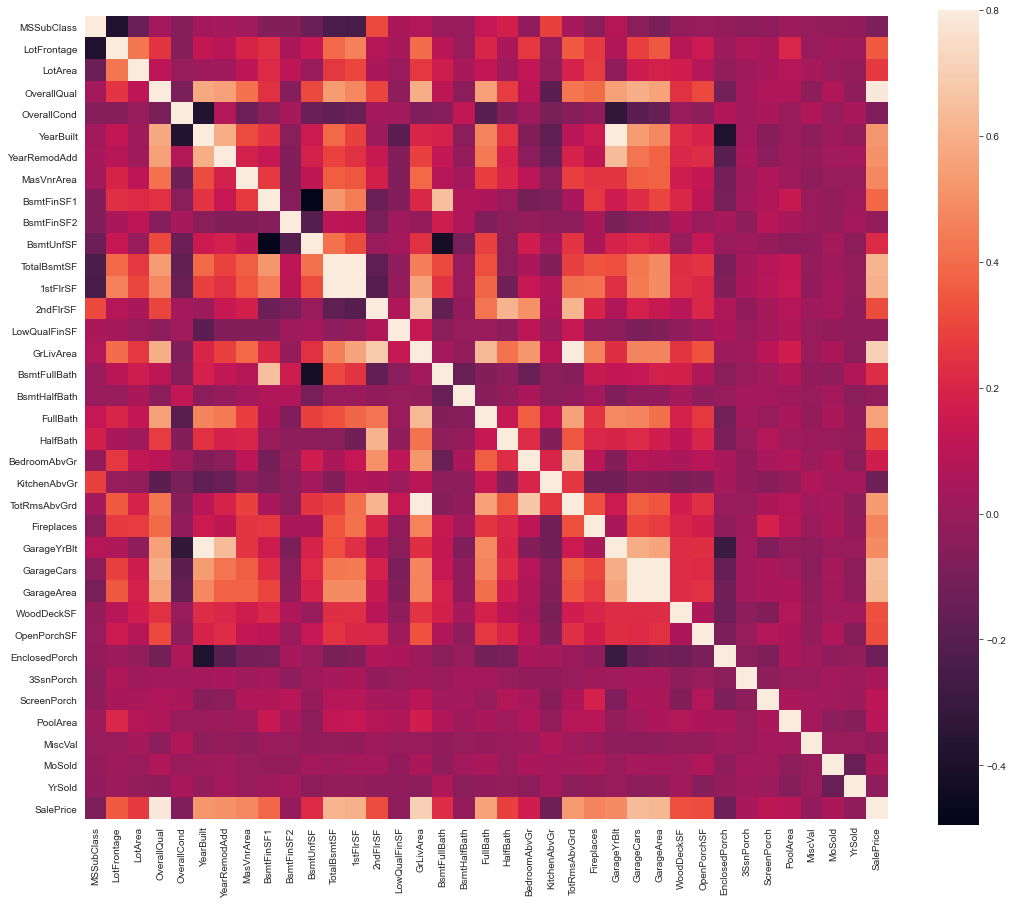

In [8]:
corr = train.corr()
f, ax = plt.subplots(figsize = (18,15))
sns.heatmap(corr, vmax = .8, square = True)

### pick the top 10 features which correlated to the SalePrice

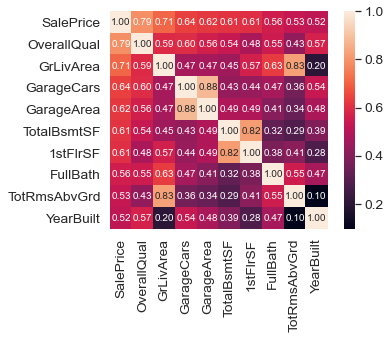

In [9]:
c = 10
cols = corr.nlargest(c, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10 } ,yticklabels=cols.values,xticklabels=cols.values)
plt.show()

### we keep those features(which rel numbers are over 50%): OverallQual, GrLivArea, GarageArea,TotalBsmtSF. delete both GarageCars(which relaetedc to GrLivArea) and 1stFirSF(which related to TotalBsmtSF)

<Figure size 432x288 with 0 Axes>

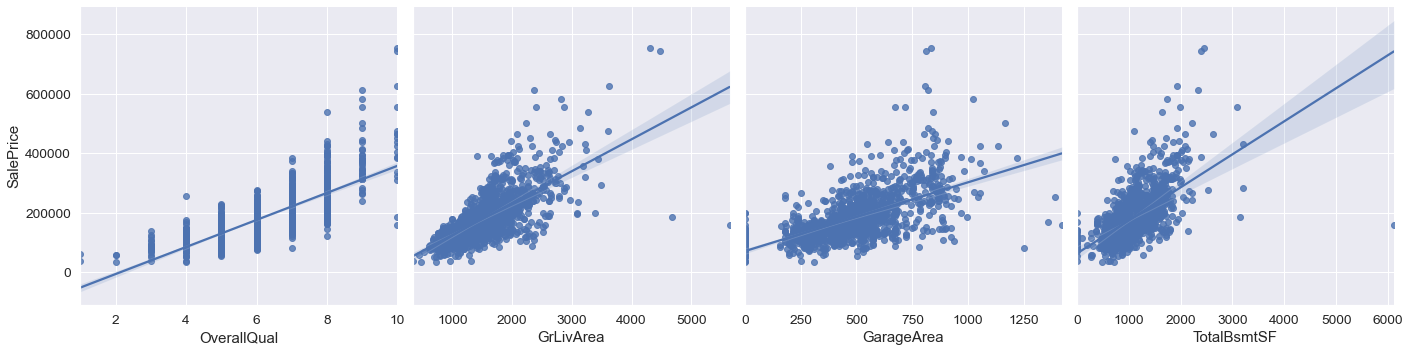

In [10]:
figure = plt.figure()
sns.pairplot(x_vars = ['OverallQual','GrLivArea','GarageArea','TotalBsmtSF'], y_vars = ['SalePrice'], data = train, dropna = True, size = 5, kind = "reg") 

### for discrete numerical variables, we use boxplot to describe the relationships bwtween SalesPrice and those variables

In [11]:
### here we pick four important features based on experienses:'OverallQual', 'YearBuilt','Fireplaces','FullBath'

(-0.5, 9.5, 0.0, 900000.0)

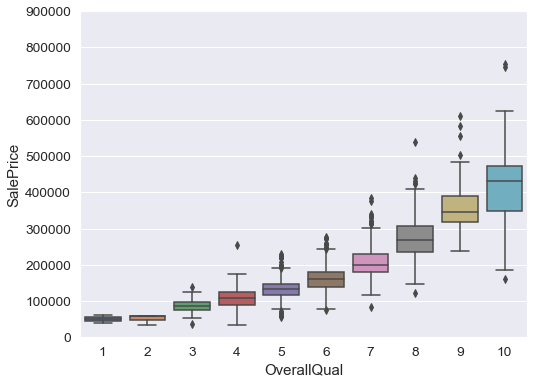

In [12]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'],train[var]], axis = 1)
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 900000)

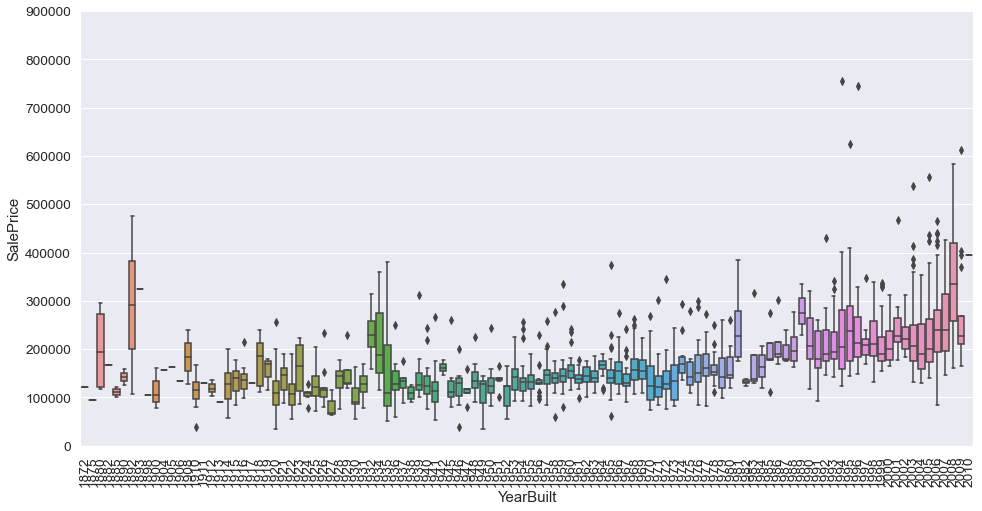

In [13]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'],train[var]], axis = 1)
f, ax = plt.subplots(figsize = (16,8))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
plt.axis(ymin = 0, ymax = 900000)
plt.xticks(rotation = 90)
plt.show()

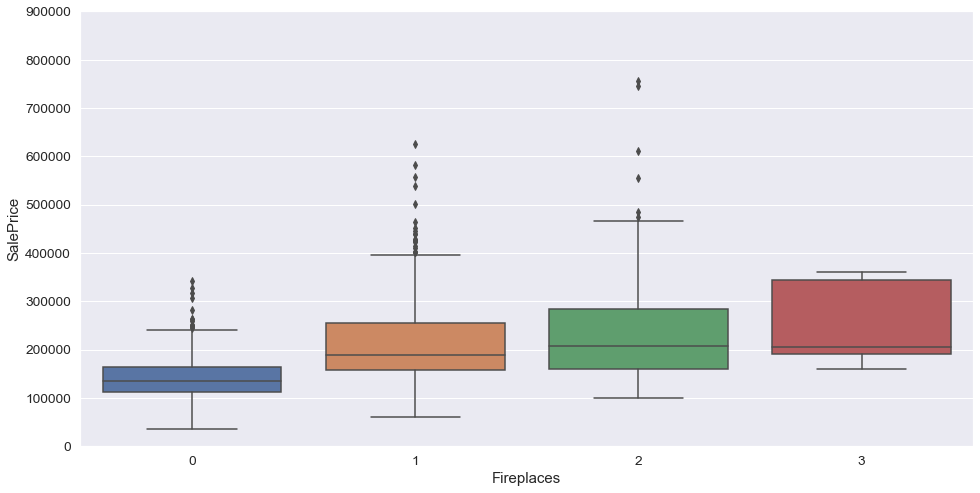

In [14]:
var = 'Fireplaces'
data = pd.concat([train['SalePrice'],train[var]], axis = 1)
f, ax = plt.subplots(figsize = (16,8))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
plt.axis(ymin = 0, ymax = 900000)
plt.show()

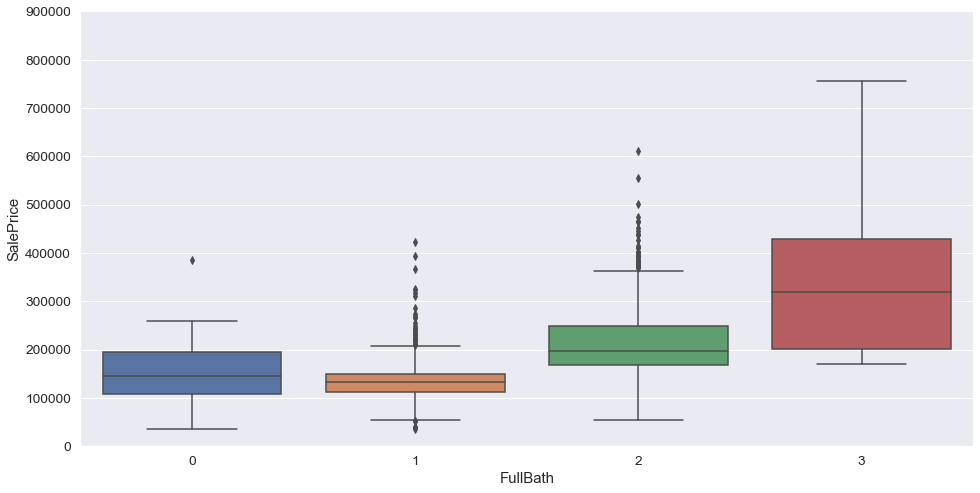

In [15]:
var = 'FullBath'
data = pd.concat([train['SalePrice'],train[var]], axis = 1)
f, ax = plt.subplots(figsize = (16,8))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
plt.axis(ymin = 0, ymax = 900000)
plt.show()

### deal with the outliers

<Figure size 432x288 with 0 Axes>

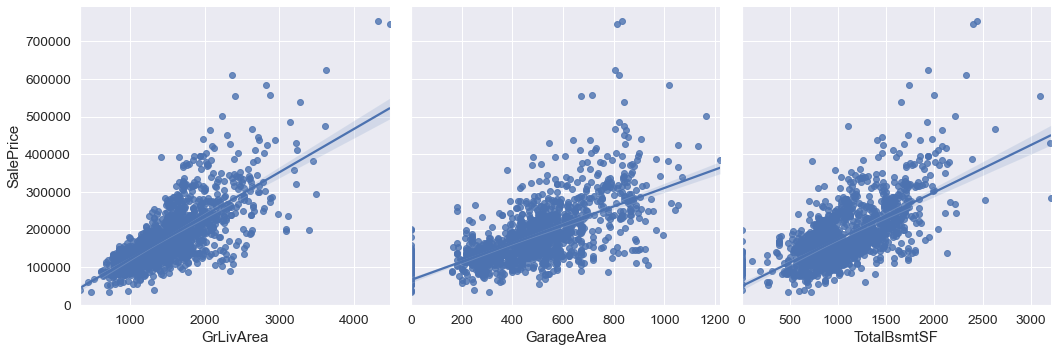

In [16]:
#delete teh outliers

train = train.drop(train[(train['GrLivArea'] > 4000)&(train['SalePrice'] < 300000)].index)
train = train.drop(train[(train['GarageArea'] > 1200)&(train['SalePrice'] < 300000)].index)
train = train.drop(train[(train['TotalBsmtSF'] > 5000)&(train['SalePrice'] < 200000)].index)
figure = plt.figure()
sns.pairplot(x_vars=['GrLivArea','GarageArea','TotalBsmtSF'],y_vars=['SalePrice'],data=train,dropna=True,size=5,kind="reg")
plt.show()

### deal with missings

In [17]:
all_data_na = (all_data.isnull().sum()/len(all_data))* 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)[:20]
missing_data = pd.DataFrame({'Missin_data_Ratio': all_data_na})
missing_data.head(25)

,Missin_data_Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071
GarageYrBlt,5.447071


### delete those features whichmissing values were over 50% 

In [18]:
all_data = all_data.drop('PoolQC', axis = 1)
all_data = all_data.drop('MiscFeature', axis = 1)
all_data = all_data.drop('Alley', axis = 1)
all_data = all_data.drop('Fence', axis = 1)
all_data = all_data.drop('Utilities',axis = 1)
all_data.shape

(2919, 74)

In [19]:
# use median to fill lotfrontage
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))
# use none to fill categorical features of garage's & basements's

for col in ('FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType'):
    all_data[col] = all_data[col].fillna('None')
#use 0 to fill numerical features of garage's & basements's

for col in ('GarageYrBlt','GarageArea','GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea'):
    all_data[col] = all_data[col].fillna(0)

all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

#all_data = all_data.drop('Utilities',axis = 1)

In [20]:
all_data.isnull().sum().sort_values(ascending = False).head(100)

MSSubClass       0
GarageType       0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
                ..
ExterQual        0
MasVnrArea       0
MasVnrType       0
Exterior2nd      0
SaleCondition    0
Length: 74, dtype: int64

### find the ditribution of SalePrice

mu = 180921.1959 and sigma =79415.2919 


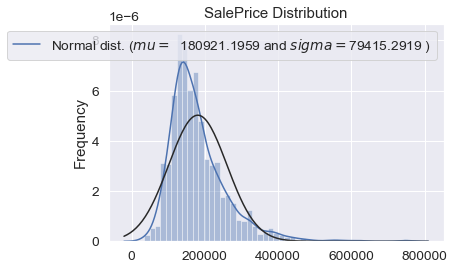

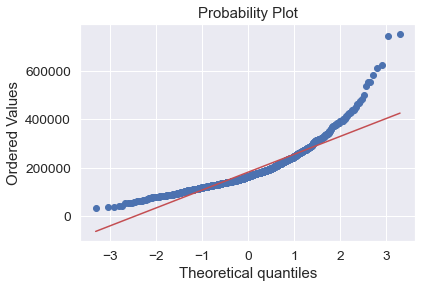

In [21]:
sns.distplot(y_train_original,fit=norm);
(mu,sigma) = norm.fit(y_train_original)
print('mu = {:.4f} and sigma ={:.4f} '.format(mu, sigma) )
plt.legend(['Normal dist. ($mu=$ {: .4f} and $sigma = ${:.4f} )'.format(mu,sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')
fig = plt.figure()
res = stats.probplot(y_train_original, plot = plt)
plt.show()

mu = 12.0242 and sigma =0.3994 


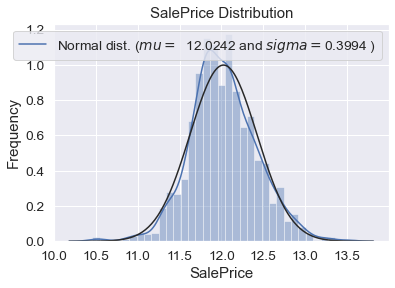

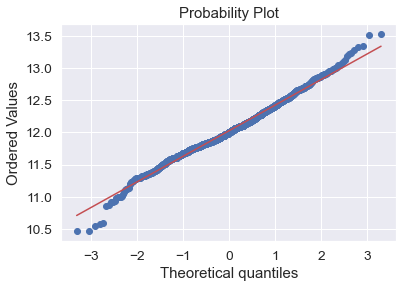

In [22]:
#use log to transfer the SalePrice
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice'] ,fit=norm);
(mu,sigma) = norm.fit(train['SalePrice'] )
print('mu = {:.4f} and sigma ={:.4f} '.format(mu, sigma) )
plt.legend(['Normal dist. ($mu=$ {: .4f} and $sigma = ${:.4f} )'.format(mu,sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')
fig = plt.figure()
res = stats.probplot(train['SalePrice'] , plot = plt)
plt.show()

# step 4: feature engineering

In [23]:
all_data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,IR1,Lvl,Inside,Gtl,Mitchel,...,30,0,320,0,0,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,Reg,Lvl,Inside,Gtl,Somerst,...,57,0,0,0,0,0,8,2007,WD,Normal
7,60,RL,80.0,10382,Pave,IR1,Lvl,Corner,Gtl,NWAmes,...,204,228,0,0,0,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,Reg,Lvl,Inside,Gtl,OldTown,...,0,205,0,0,0,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,Reg,Lvl,Corner,Gtl,BrkSide,...,4,0,0,0,0,0,1,2008,WD,Normal


In [24]:
# some features which is numbers, but actually they are meanless if we take them into numerical features, so we change their types

all_data['MSSubClass'] = all_data['MSSubClass'].astype(str) 
all_data['YrSold'] = all_data['YrSold'].astype(str) 
all_data['MoSold'] = all_data['MoSold'].astype(str) 
all_data['OverallCond'] = all_data['OverallCond'].astype(str) 


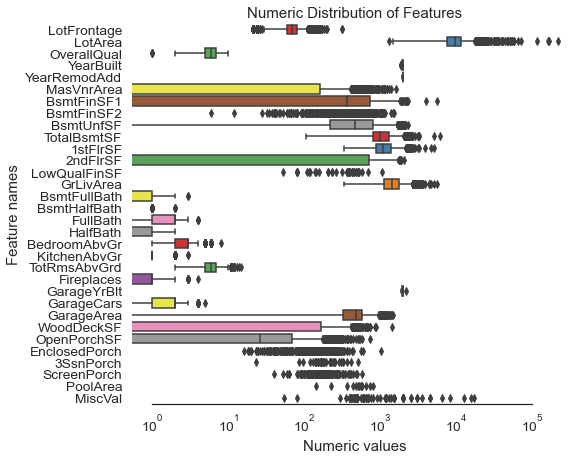

In [25]:
# find the distribution of numerical features

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_data = []
for i in all_data.columns:
    if all_data[i].dtype in numeric_dtypes:
        numeric_data.append(i)
        
sns.set_style('white')
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale('log')
ax = sns.boxplot(data=all_data[numeric_data] , orient='h', palette='Set1')
ax.xaxis.grid(False)
ax.set(ylabel='Feature names')
ax.set(xlabel='Numeric values')
ax.set(title='Numeric Distribution of Features')
sns.despine(trim=True, left=True)


In [26]:

skew_all_data = all_data[numeric_data].apply(lambda x:skew(x)).sort_values(ascending=False)
high_skew = skew_all_data[skew_all_data>0.15]
skew_index = high_skew.index
print('There are {} numeric features with skew > 0.15'.format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew':high_skew})
skew_all_data.head(25)


There are 28 numeric features with skew > 0.15


MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
MasVnrArea        2.613592
OpenPorchSF       2.535114
WoodDeckSF        1.842433
LotFrontage       1.505704
1stFlrSF          1.469604
BsmtFinSF1        1.425230
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
BedroomAbvGr      0.326324
dtype: float64

In [27]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
for i in skew_index:
    all_data[i] = boxcox1p(all_data[i], boxcox_normmax(all_data[i] + 1))

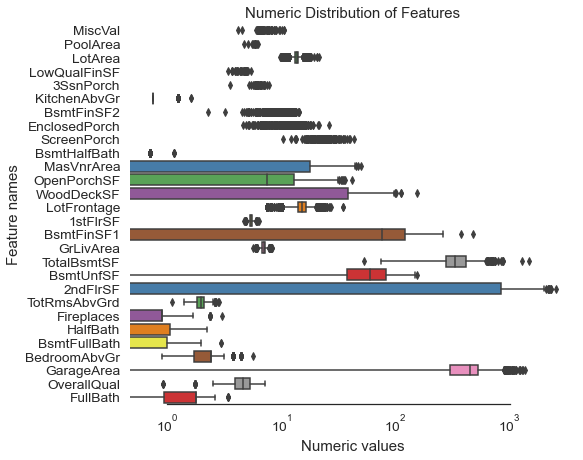

In [28]:

sns.set_style('white')
f,ax = plt.subplots(figsize=(8,7))
ax.set_xscale('log')
ax = sns.boxplot(data=all_data[skew_index],orient='h',palette='Set1')
ax.xaxis.grid(False)
ax.set(ylabel='Feature names')
ax.set(xlabel='Numeric values')
ax.set(title='Numeric Distribution of Features')
sns.despine(trim=True,left=True)

In [29]:
all_dummy_data = pd.get_dummies(all_data)
#all_dummy_data.head()
all_dummy_data.head(20)

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,14.663551,13.424521,5.326150,2003,2003,19.378557,117.855872,0.000000,30.016555,296.832292,...,0,0,0,1,0,0,0,0,1,0
1,16.494888,13.694528,4.661796,1976,1976,0.000000,146.805810,0.000000,44.178889,407.302360,...,0,0,0,1,0,0,0,0,1,0
2,15.044952,14.034134,5.326150,2001,2002,17.721068,91.575291,0.000000,56.957796,314.805018,...,0,0,0,1,0,0,0,0,1,0
3,14.008495,13.683422,5.326150,1915,1970,0.000000,52.776371,0.000000,64.881737,268.234256,...,0,0,0,1,1,0,0,0,0,0
4,16.954473,14.550143,5.973807,2000,2000,25.323125,112.040333,0.000000,61.233859,376.259314,...,0,0,0,1,0,0,0,0,1,0
5,17.067704,14.527690,3.977814,1993,1995,0.000000,120.766693,0.000000,17.730052,279.753461,...,0,0,0,1,0,0,0,0,1,0
6,15.904480,13.799372,5.973807,2004,2005,18.909628,184.077267,0.000000,47.194866,515.690858,...,0,0,0,1,0,0,0,0,1,0
7,16.494888,13.861652,5.326150,1973,1973,21.292508,134.521191,4.748093,37.457484,366.051537,...,0,0,0,1,0,0,0,0,1,0
8,12.759262,12.754395,5.326150,1931,1950,0.000000,0.000000,0.000000,90.816886,323.703092,...,0,0,0,1,1,0,0,0,0,0
9,12.614126,13.152360,3.977814,1939,1950,0.000000,133.675691,0.000000,28.778206,334.472494,...,0,0,0,1,0,0,0,0,1,0


In [30]:
all_data.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,14.663551,13.424521,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,12.009560,0.000000,0.000000,0.00000,0.0,0.000000,2,2008,WD,Normal
1,20,RL,16.494888,13.694528,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,5,2007,WD,Normal
2,60,RL,15.044952,14.034134,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,9.849186,0.000000,0.000000,0.00000,0.0,0.000000,9,2008,WD,Normal
3,70,RL,14.008495,13.683422,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,8.921747,16.012024,0.000000,0.00000,0.0,0.000000,2,2006,WD,Abnorml
4,60,RL,16.954473,14.550143,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,14.180239,0.000000,0.000000,0.00000,0.0,0.000000,12,2008,WD,Normal
5,50,RL,17.067704,14.527690,Pave,IR1,Lvl,Inside,Gtl,Mitchel,...,8.196682,0.000000,7.112852,0.00000,0.0,6.936388,10,2009,WD,Normal
6,20,RL,15.904480,13.799372,Pave,Reg,Lvl,Inside,Gtl,Somerst,...,11.588876,0.000000,0.000000,0.00000,0.0,0.000000,8,2007,WD,Normal
7,60,RL,16.494888,13.861652,Pave,IR1,Lvl,Corner,Gtl,NWAmes,...,22.151591,14.950411,0.000000,0.00000,0.0,6.166657,11,2009,WD,Normal
8,50,RM,12.759262,12.754395,Pave,Reg,Lvl,Inside,Gtl,OldTown,...,0.000000,14.339761,0.000000,0.00000,0.0,0.000000,4,2008,WD,Abnorml
9,190,RL,12.614126,13.152360,Pave,Reg,Lvl,Corner,Gtl,BrkSide,...,2.362388,0.000000,0.000000,0.00000,0.0,0.000000,1,2008,WD,Normal


In [31]:
all_dummy_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 321 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(30), int64(2), uint8(289)
memory usage: 1.5 MB


In [32]:
#decrease the numbers of features
threshold = 0.9 
corr_matrix = all_dummy_data.corr().abs()
corr_matrix.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
LotFrontage,1.000000,0.671598,0.195837,0.110121,0.078630,0.201358,0.159890,0.054415,0.095270,0.319650,...,0.041183,0.105929,0.001783,0.078659,0.002393,0.047414,0.009597,0.016878,0.076831,0.103886
LotArea,0.671598,1.000000,0.150449,0.037624,0.043675,0.120188,0.173160,0.074964,0.070596,0.318627,...,0.017388,0.060244,0.003797,0.039880,0.012588,0.022725,0.026378,0.030052,0.049040,0.061872
OverallQual,0.195837,0.150449,1.000000,0.597062,0.571256,0.442279,0.229097,0.076460,0.274762,0.544494,...,0.047656,0.333776,0.053108,0.190422,0.128762,0.049459,0.040329,0.023006,0.130227,0.328727
YearBuilt,0.110121,0.037624,0.597062,1.000000,0.612235,0.374732,0.258276,0.050478,0.100642,0.405128,...,0.044896,0.343880,0.013920,0.204604,0.120524,0.077741,0.025116,0.036093,0.137934,0.339458
YearRemodAdd,0.078630,0.043675,0.571256,0.612235,1.000000,0.220615,0.114138,0.090950,0.160331,0.299245,...,0.053361,0.325597,0.027107,0.156000,0.146265,0.078213,0.034022,0.049794,0.102889,0.323272


In [33]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k= 1).astype(np.bool))
upper.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
LotFrontage,NaN,0.671598,0.195837,0.110121,0.078630,0.201358,0.159890,0.054415,0.095270,0.319650,...,0.041183,0.105929,0.001783,0.078659,0.002393,0.047414,0.009597,0.016878,0.076831,0.103886
LotArea,NaN,NaN,0.150449,0.037624,0.043675,0.120188,0.173160,0.074964,0.070596,0.318627,...,0.017388,0.060244,0.003797,0.039880,0.012588,0.022725,0.026378,0.030052,0.049040,0.061872
OverallQual,NaN,NaN,NaN,0.597062,0.571256,0.442279,0.229097,0.076460,0.274762,0.544494,...,0.047656,0.333776,0.053108,0.190422,0.128762,0.049459,0.040329,0.023006,0.130227,0.328727
YearBuilt,NaN,NaN,NaN,NaN,0.612235,0.374732,0.258276,0.050478,0.100642,0.405128,...,0.044896,0.343880,0.013920,0.204604,0.120524,0.077741,0.025116,0.036093,0.137934,0.339458
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,0.220615,0.114138,0.090950,0.160331,0.299245,...,0.053361,0.325597,0.027107,0.156000,0.146265,0.078213,0.034022,0.049794,0.102889,0.323272


In [34]:
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns needed to remove.'%(len(to_drop)))

There are 23 columns needed to remove.


In [35]:
all_dummy_data = all_dummy_data.drop(columns = to_drop)
all_dummy_data.shape

(2919, 298)

In [36]:

filter_train = all_dummy_data[:ntrain]
filter_test = all_dummy_data[ntrain:]

sale_price = pd.DataFrame(data = y_train)
filter_train = pd.concat([filter_train, sale_price] ,axis = 1 )
filter_train.shape, filter_test.shape

((1460, 299), (1459, 298))

# step 5: model selection

In [37]:

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


In [38]:
filter_train.head(10)

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,0
0,14.663551,13.424521,5.326150,2003,2003,19.378557,117.855872,0.000000,30.016555,296.832292,...,0,0,0,1,0,0,0,0,1,12.247699
1,16.494888,13.694528,4.661796,1976,1976,0.000000,146.805810,0.000000,44.178889,407.302360,...,0,0,0,1,0,0,0,0,1,12.109016
2,15.044952,14.034134,5.326150,2001,2002,17.721068,91.575291,0.000000,56.957796,314.805018,...,0,0,0,1,0,0,0,0,1,12.317171
3,14.008495,13.683422,5.326150,1915,1970,0.000000,52.776371,0.000000,64.881737,268.234256,...,0,0,0,1,1,0,0,0,0,11.849405
4,16.954473,14.550143,5.973807,2000,2000,25.323125,112.040333,0.000000,61.233859,376.259314,...,0,0,0,1,0,0,0,0,1,12.429220
5,17.067704,14.527690,3.977814,1993,1995,0.000000,120.766693,0.000000,17.730052,279.753461,...,0,0,0,1,0,0,0,0,1,11.870607
6,15.904480,13.799372,5.973807,2004,2005,18.909628,184.077267,0.000000,47.194866,515.690858,...,0,0,0,1,0,0,0,0,1,12.634606
7,16.494888,13.861652,5.326150,1973,1973,21.292508,134.521191,4.748093,37.457484,366.051537,...,0,0,0,1,0,0,0,0,1,12.206078
8,12.759262,12.754395,5.326150,1931,1950,0.000000,0.000000,0.000000,90.816886,323.703092,...,0,0,0,1,1,0,0,0,0,11.774528
9,12.614126,13.152360,3.977814,1939,1950,0.000000,133.675691,0.000000,28.778206,334.472494,...,0,0,0,1,0,0,0,0,1,11.678448


In [39]:

X = filter_train.drop(columns= 0)
y = filter_train[0]
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=10)

kf = KFold(n_splits=10, random_state=50, shuffle=True)


In [40]:

warnings.filterwarnings('ignore')

lgb = LGBMRegressor(objective='regression', random_state=50)
xgb = XGBRegressor(objective='reg:squarederror',random_state=50)
ridge = make_pipeline(RobustScaler(), RidgeCV(cv=kf))
svr = make_pipeline(RobustScaler(), SVR())
gbr = GradientBoostingRegressor(random_state=50)
rf = RandomForestRegressor(random_state=50)
 

models = [lgb, xgb, ridge, svr, gbr, rf]
model_names = ['lgb','xgb','ridge','svr','gbr','rf']
scores = {}
 
for i, model in enumerate(models):
    score = rmse_cv(model)
    print('{} rmse score: {:.4f}, rmse std: {:.4f}'.format(model_names[i], score.mean(), score.std()))
    scores[model_names[i]] = (score.mean(), score.std())
    
rmse_df = pd.DataFrame(scores, index=['rmse_score','rmse_std'])
rmse_df.sort_values('rmse_score', axis=1, inplace=True)
rmse_df


lgb rmse score: 0.1340, rmse std: 0.0082
xgb rmse score: 0.1432, rmse std: 0.0089
ridge rmse score: 0.1279, rmse std: 0.0171
svr rmse score: 0.1378, rmse std: 0.0122
gbr rmse score: 0.1297, rmse std: 0.0096
rf rmse score: 0.1460, rmse std: 0.0076


,ridge,gbr,lgb,svr,xgb,rf
rmse_score,0.127895,0.129668,0.134043,0.137795,0.143210,0.145970
rmse_std,0.017126,0.009598,0.008212,0.012163,0.008868,0.007641


(0.13727983896783258,)
(0.12865319819761128,)
(0.12853561016261242,)
(0.13391889544859464,)
(0.13642696668936544,)
(0.14174050772928587,)


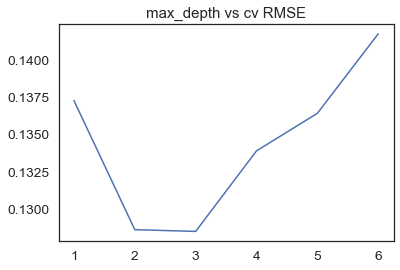

In [42]:
params = [1,2,3,4,5,6]
test_scores = []
for param in params:
    clf = XGBRegressor(max_depth = param)
    test_score = np.sqrt(-cross_val_score(clf, X, y, cv= 10, scoring = 'neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

for test_score in zip(test_scores):
    print(test_score)

    
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.plot(params, test_scores)
plt.title('max_depth vs cv RMSE');